<a href="https://colab.research.google.com/github/debnarayankundu/Laptop_Price_predictor/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Original Training Data Shape:", X_train.shape)
print("Original Training Labels Shape:", y_train.shape)
print("Original Test Data Shape:", X_test.shape)
print("Original Test Labels Shape:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original Training Data Shape: (60000, 28, 28)
Original Training Labels Shape: (60000,)
Original Test Data Shape: (10000, 28, 28)
Original Test Labels Shape: (10000,)


In [2]:

train_filter = np.isin(y_train, [1, 2, 3, 4])
test_filter = np.isin(y_test, [1, 2, 3, 4])


X_train_filtered = X_train[train_filter]
y_train_filtered = y_train[train_filter]
X_test_filtered = X_test[test_filter]
y_test_filtered = y_test[test_filter]


print("Filtered Training Data Shape:", X_train_filtered.shape)
print("Filtered Training Labels Shape:", y_train_filtered.shape)
print("Filtered Test Data Shape:", X_test_filtered.shape)
print("Filtered Test Labels Shape:", y_test_filtered.shape)


Filtered Training Data Shape: (24673, 28, 28)
Filtered Training Labels Shape: (24673,)
Filtered Test Data Shape: (4159, 28, 28)
Filtered Test Labels Shape: (4159,)


In [3]:

X_train, X_val, y_train, y_val = train_test_split(X_train_filtered, y_train_filtered, test_size=0.2, random_state=42)


print("Post-Split Training Data Shape:", X_train.shape)
print("Post-Split Training Labels Shape:", y_train.shape)
print("Post-Split Validation Data Shape:", X_val.shape)
print("Post-Split Validation Labels Shape:", y_val.shape)


Post-Split Training Data Shape: (19738, 28, 28)
Post-Split Training Labels Shape: (19738,)
Post-Split Validation Data Shape: (4935, 28, 28)
Post-Split Validation Labels Shape: (4935,)


In [4]:

X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test_filtered.reshape((X_test_filtered.shape[0], 28 * 28)).astype('float32') / 255
X_val = X_val.reshape((X_val.shape[0], 28 * 28)).astype('float32') / 255


print("Reshaped Training Data Shape:", X_train.shape)
print("Reshaped Test Data Shape:", X_test.shape)
print("Reshaped Validation Data Shape:", X_val.shape)


Reshaped Training Data Shape: (19738, 784)
Reshaped Test Data Shape: (4159, 784)
Reshaped Validation Data Shape: (4935, 784)


In [5]:

y_train = y_train - 1
y_val = y_val - 1
y_test_filtered = y_test_filtered - 1


y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_val_one_hot = tf.keras.utils.to_categorical(y_val, num_classes=4)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_filtered, num_classes=4)


print("Final Training Data Shape:", X_train.shape)
print("Final Training Labels Shape:", y_train_one_hot.shape)
print("Final Validation Data Shape:", X_val.shape)
print("Final Validation Labels Shape:", y_val_one_hot.shape)


Final Training Data Shape: (19738, 784)
Final Training Labels Shape: (19738, 4)
Final Validation Data Shape: (4935, 784)
Final Validation Labels Shape: (4935, 4)


In [6]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28 * 28,)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.7))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])


In [7]:

model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_val, y_val_one_hot))


Epoch 1/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.7599 - loss: 0.5959 - val_accuracy: 0.9783 - val_loss: 0.0792
Epoch 2/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9706 - loss: 0.1212 - val_accuracy: 0.9834 - val_loss: 0.0620
Epoch 3/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9812 - loss: 0.0748 - val_accuracy: 0.9840 - val_loss: 0.0656
Epoch 4/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9826 - loss: 0.0677 - val_accuracy: 0.9866 - val_loss: 0.0526
Epoch 5/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9887 - loss: 0.0512 - val_accuracy: 0.9878 - val_loss: 0.0541
Epoch 6/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9882 - loss: 0.0438 - val_accuracy: 0.9860 - val_loss: 0.0585
Epoch 7/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9874 - loss: 0.0470 - val_accuracy: 0.9887 - val_loss: 0.0420
Epoch 8/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9906 - loss: 0.0395 - val_

In [8]:

test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print("Test Accuracy:", test_acc)


130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9923 - loss: 0.0468
Test Accuracy: 0.9925462603569031


130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


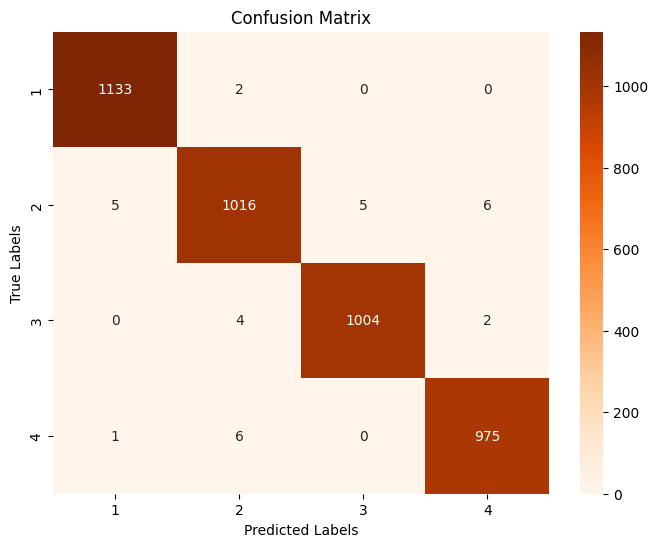

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_original = np.argmax(y_test_one_hot, axis=1)


cm = confusion_matrix(y_test_original, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
